<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/obj_to_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. https://drive.google.com/file/d/1wtK1ydagyGr05fIjgwVRNL7AYTzbXVpb/view?usp=sharing
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
ids = ['1wtK1ydagyGr05fIjgwVRNL7AYTzbXVpb']
zip_files = ['frame032.png.zip']
for id, zip_file in zip(ids, zip_files):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(zip_file)
    !unzip -q $zip_file

replace frame032.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

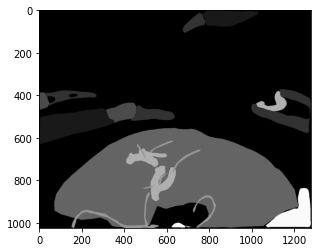

In [ ]:
img = cv2.imread('frame032.png')
plt.imshow(img)

In [ ]:
np.unique(img)

array([  0,  25,  50,  75, 100, 150, 175, 250], dtype=uint8)

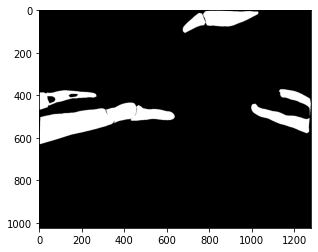

In [ ]:
img[img==250] = 0
img[img==175] = 0
img[img==150] = 0
img[img==100] = 0
img[img>0] = 255
plt.imshow(img)

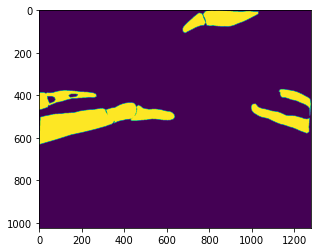

In [ ]:
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw=cv2.threshold(gry, 127, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bw)

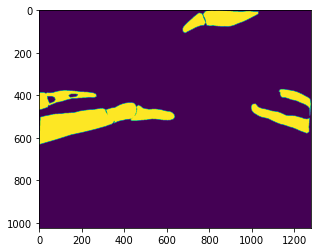

In [ ]:
imFlood = bw.copy()
h, w = bw.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(imFlood, mask, (0,0), 0)
#imFlood[np.where(bw==0)]=255
#imFlood=~imFlood
plt.imshow(imFlood)

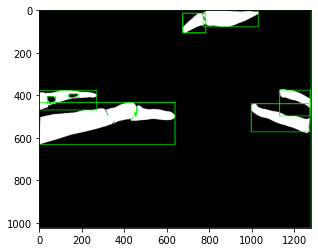

In [ ]:
cnts, _ = cv2.findContours(imFlood, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for cnt in cnts:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
    x, y, w, h = cv2.boundingRect(approx)
    bob = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Save final image
#cv2.imwrite('im_6_output.png',img)
plt.imshow(img)

In [ ]:
np.array(cnts).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(19,)

In [ ]:
cnts[0]

array([[[1016,  440]],

       [[1015,  441]],

       [[1014,  441]],

       ...,

       [[1019,  441]],

       [[1018,  440]],

       [[1017,  440]]], dtype=int32)